In [1]:
from PreprocessIndeed import PreprocessIndeed
from MLIndeed import MLIndeed
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split


# countVec_titre = CountVectorizer(ngram_range=(1, 2), min_df=.005, max_df=0.8, max_features=10)
# countVec_description = CountVectorizer(ngram_range=(1, 2), min_df=.02, max_df=0.8, max_features=20)
countVec_titre = CountVectorizer(ngram_range=(1, 2), min_df=.005, max_df=0.8)
countVec_description = CountVectorizer(ngram_range=(1, 2), min_df=.02, max_df=0.8)
preprocess = PreprocessIndeed('data/BDD_14_10_2019.json')

preprocess.preprocess_df(countVec_titre, countVec_description, correlation_description=0.1, correlation_titre=0.1)
# preprocess.preprocess_df(countVec_titre, countVec_description)

X_train, X_test, y_train, y_test = \
    train_test_split(preprocess.df.drop(['Salaire'], axis=1),
                     preprocess.df['Salaire'],
                     test_size=0.25, random_state=0)



In [2]:
params={'Log Reg': {'C': [0.01, 0.1, 1, 10]},
        'SVM': {'kernel': ['rbf','linear'], 'C': [1, 10, 50, 100, 500], 'gamma': [0.01, 0.1, 1]},
        'Random Forest': {'n_estimators':  [10, 50, 100, 200], 'criterion': ['entropy', 'gini'],
                          'max_depth': [2, 3, 5], 'max_features': [2, 3, 5]},
        'Ada Boost': {'n_estimators':  [10, 50, 100, 200], 'learning_rate': [0.1, 1, 10]},
        'Gradient Boost': {'n_estimators':  [10, 20, 30], 'learning_rate': [0.01, 0.1, 1],
                           'max_depth': [2, 3, 4, 5]},
        'X Gradient Boost': {'n_estimators':  [10, 20, 30], 'max_depth': [2, 3, 4, 5, 6]}}


models = MLIndeed(X_train, X_test, y_train, y_test)
models.best_models(params, 'accuracy')
print(preprocess.df.shape)
models.accuracy()

D:\Miniconda3\envs\machinelearning\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
D:\Miniconda3\envs\machinelearning\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Miniconda3\envs\machinelearning\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
D:\Miniconda3\envs\machinelearning\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
D:\Mini

(2196, 137)


{'Log reg': {'test_accuracy': 0.7741347905282332,
  'train_accuracy': 0.8142076502732241},
 'SVM': {'test_accuracy': 0.7941712204007286,
  'train_accuracy': 0.8846387370977535},
 'Random Forest': {'test_accuracy': 0.6848816029143898,
  'train_accuracy': 0.6642380085003036},
 'Ada Boost': {'test_accuracy': 0.726775956284153,
  'train_accuracy': 0.718882817243473},
 'Gradient Boost': {'test_accuracy': 0.7777777777777778,
  'train_accuracy': 0.8111718275652702},
 'X Gradient Boost': {'test_accuracy': 0.7905282331511839,
  'train_accuracy': 0.8506375227686703}}

In [18]:
from sklearn.metrics import confusion_matrix
print('Log reg : \n'+ str( confusion_matrix(models.bestModels['Log reg'].best_estimator_.predict(X_test),y_test)))
print('SVM : \n'+ str( confusion_matrix(models.bestModels['SVM'].best_estimator_.predict(X_test),y_test)))
print('Random Forest : \n'+ str( confusion_matrix(models.bestModels['Random Forest'].best_estimator_.predict(X_test),y_test)))
print('Ada Boost : \n'+ str( confusion_matrix(models.bestModels['Ada Boost'].best_estimator_.predict(X_test),y_test)))
print('Gradient Boost : \n'+ str( confusion_matrix(models.bestModels['Gradient Boost'].best_estimator_.predict(X_test),y_test)))
print('X Gradient Boost : \n'+ str( confusion_matrix(models.bestModels['X Gradient Boost'].best_estimator_.predict(X_test),y_test)))

Log reg : 
[[ 29   1   0   0]
 [  7 270  52   4]
 [  3  40 117  14]
 [  0   0   3   9]]
SVM : 
[[ 28   0   0   0]
 [  7 263  39   4]
 [  3  48 132  10]
 [  1   0   1  13]]
Random Forest : 
[[ 29   0   0   0]
 [  8 270  59   6]
 [  2  41 113  15]
 [  0   0   0   6]]
Ada Boost : 
[[ 28   0   0   0]
 [  9 263  71   7]
 [  2  48 100  12]
 [  0   0   1   8]]
Gradient Boost : 
[[ 30   0   0   0]
 [  6 274  43   2]
 [  2  37 129  14]
 [  1   0   0  11]]
X Gradient Boost : 
[[ 29   0   1   0]
 [  7 274  46   3]
 [  2  37 123  16]
 [  1   0   2   8]]


# K-means

In [4]:
from PreprocessIndeed import preprocess_salaires
df = preprocess.data.loc[preprocess.data['Salaire'] != 'None', :]
df = df.loc[df['Descriptif_du_poste'] != 'None', :]
df = df.loc[df['Salaire'].apply(lambda x: 'semaine' not in x), :]
df['Salaire'] = df['Salaire'].apply(preprocess_salaires)

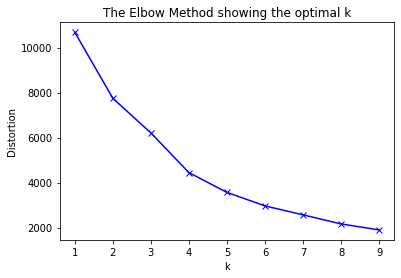

In [5]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
distortions = []
X=df['Salaire'].values.reshape(-1,1)
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k, init='k-means++', random_state=0 )
    kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [6]:
kmeanModel = KMeans(n_clusters=4, random_state=0 )
kmeanModel.fit(X)
kmeanModel.cluster_centers_

array([[36557.32519616],
       [83879.94196429],
       [51244.98018494],
       [12171.94444444]])

In [95]:
print((12171.94444444+36557.32519616)/2)
print((36557.32519616+51244.98018494)/2)
print((51244.98018494+83879.94196429)/2)

24364.6348203
43901.15269055001
67562.461074615


# Xgboost

In [7]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
xgboost = XGBClassifier(random_state=0, n_estimators=30, max_depth=6)
xgboost.fit(X_train, y_train)
print('xgboost : \n'+ str(confusion_matrix(xgboost.predict(X_test), y_test)))
print(accuracy_score(xgboost.predict(X_test), y_test))
print(accuracy_score(xgboost.predict(X_train), y_train))

xgboost : 
[[ 29   0   1   0]
 [  7 274  46   3]
 [  2  37 123  16]
 [  1   0   2   8]]
0.7905282331511839
0.8506375227686703


# Pickle

In [23]:
import pickle
filename = 'log_reg.sav'
pickle.dump(models.bestModels['Log reg'].best_estimator_, open(filename, 'wb'))
 
# load the model from disk
log_reg_model = pickle.load(open(filename, 'rb'))
result = log_reg_model.score(X_test, y_tes)
print(result)

0.7741347905282332


In [16]:
preprocess.df.to_csv('preprocessed_all_features.csv')

# Clean features

In [19]:
df = preprocess.df.copy()
for i in X_test.columns:
    print(i)

Ville_Banlieue_de_Bordeaux
Ville_Banlieue_de_Lyon
Ville_Banlieue_de_Nantes
Ville_Banlieue_de_Paris
Ville_Banlieue_de_Toulouse
Ville_Bordeaux
Ville_Lyon
Ville_Nantes
Ville_Paris
Ville_Toulouse
Titre_chef projet
Titre_data
Titre_data scientist
Titre_developpeur web
Titre_directeur
Titre_freelance
Titre_junior
Titre_lead data
Titre_marketing
Titre_mois
Titre_projet
Titre_ref
Titre_scientist
Titre_senior
Titre_stage
Titre_stage chef
Titre_stage developpeur
Titre_stagiaire
Titre_web
Description_alternance
Description_an
Description_an souhaite
Description_ans experience
Description_ans paris
Description_apprentissage
Description_architecture
Description_aws
Description_bac
Description_bac bac
Description_bac bts
Description_bac minimum
Description_backend
Description_backend developer
Description_bonnes pratiques
Description_brut
Description_bts
Description_bts dut
Description_capacite travailler
Description_cdd
Description_cdi environ
Description_commerce
Description_confirme
Description_c

In [31]:
df.columns[25].replace(' ','_')

'Titre_stage_developpeur'

In [17]:
df = preprocess.df.copy()
# regroupements
df['Titre_stage']=df['Titre_stage'] + df['Titre_stage_chef'] + df['Titre_stage_developpeur'] + df['Titre_stagiaire']
df['Titre_stage']=df['Titre_stage'].apply(lambda x : 1 if x>=1 else 0)
                        
df['Description_bac']= df['Description_bac'] + df['Description_bac_bac'] + df['Description_bac_bts'] + df['Description_bac_minimum'] + df['Description_formation_bac']
df['Description_bac']=df['Description_bac'].apply(lambda x : 1 if x>=1 else 0)

df['Description_backend']= df['Description_backend'] + df['Description_backend_developer'] + df['Description_developer_backend']
df['Description_backend']=df['Description_backend'].apply(lambda x : 1 if x>=1 else 0)

df['Description_bts'] = df['Description_bts'] + df['Description_bts_dut']
df['Description_bts']=df['Description_bts'].apply(lambda x : 1 if x>=1 else 0)

df['Description_data_scientist'] = df['Description_data_scientist'] + df['Description_data_scientists']
df['Description_data_scientist']=df['Description_data_scientist'].apply(lambda x : 1 if x>=1 else 0)

df['Description_dut'] = df['Description_dut'] + df['Description_dut_deug']
df['Description_dut']=df['Description_dut'].apply(lambda x : 1 if x>=1 else 0)

df['Description_html_css'] = df['Description_css'] + df['Description_html'] + df['Description_html_css']
df['Description_html_css']=df['Description_html_css'].apply(lambda x : 1 if x>=1 else 0)

df['Description_lead'] = df['Description_lead'] + df['Description_lead_developer']
df['Description_lead']=df['Description_lead'].apply(lambda x : 1 if x>=1 else 0)

df['Description_stage'] = df['Description_stage'] + df['Description_stage_salaire']
df['Description_stage']=df['Description_stage'].apply(lambda x : 1 if x>=1 else 0)

# supprime ce qu'on a regroupé et ce qui n'est pas censé avoir de l'impact
df = df.drop(['Titre_mois', 'Titre_ref', 'Description_an','Description_an_souhaite', 'Description_ans_experience',
              'Description_ans_paris', 'Description_apprentissage', 'Description_bac_bac', 'Description_bac_bts',
              'Description_bac_minimum', 'Description_backend_developer', 'Description_bonnes_pratiques', 'Description_bts_dut', 
              'Description_capacite_travailler', 'Description_cdd', 'Description_cdi_environ', 'Description_commerce', 
              'Description_css', 'Description_cto', 'Description_curieux', 'Description_data_scientists', 'Description_debut',
              'Description_deug', 'Description_developer_cdi', 'Description_developer_backend', 'Description_developer_cdi', 
              'Description_developpement_informatique', 'Description_duree', 'Description_dut_deug', 'Description_embauche', 
              'Description_emploi', 'Description_emploi_stage', 'Description_emploi_temps', 'Description_environ',
              'Description_etude', 'Description_excel', 'Description_fin', 'Description_formation', 'Description_formation_bac', 
              'Description_fr', 'Description_grand', 'Description_html', 'Description_http',
              'Description_immobilier', 'Description_industrialisation', 'Description_informations', 'Description_informatique',
              'Description_lead_developer', 'Description_learning', 'Description_machine', 'Description_missions',
              'Description_mois', 'Description_mois_experience', 'Description_paris_poste', 'Description_pourquoi',
              'Description_pourquoi_venir', 'Description_pourvoir', 'Description_pratiques', 'Description_profil', 
              'Description_recruter', 'Description_remboursement', 'Description_renforce', 'Description_rigoureux',
              'Description_salaire', 'Description_salaire_mois', 'Description_scientist', 'Description_scientists',
              'Description_similaire', 'Description_similaire_an', 'Description_site', 'Description_solide', 
              'Description_souhaite', 'Description_specialisee', 'Description_stack', 'Description_stack_developer',
              'Description_stage_salaire', 'Description_tdd', 'Description_temps', 'Description_temps_plein',
              'Description_transport', 'Description_type', 'Description_type_contrat', 'Description_type_emploi',
              'Description_variees', 'Description_venir', 'Description_venir_chez', 'Description_wordpress'], axis=1 )
df.shape

(2196, 51)

In [15]:
X_train, X_test, y_train, y_test = \
    train_test_split(preprocess.df.drop(['Salaire'], axis=1),
                     preprocess.df['Salaire'],
                     test_size=0.25, random_state=0)
params={'Log Reg': {'C': [0.01, 0.1, 1, 10]},
        'SVM': {'kernel': ['rbf','linear'], 'C': [1, 10, 50, 100], 'gamma': [0.01, 0.1, 1]},
        'Random Forest': {'n_estimators':  [10, 50, 100, 200], 'criterion': ['entropy', 'gini'],
                          'max_depth': [2, 3, 5, 7, 10], 'max_features': [2, 3, 5, 7, 10]},
        'Ada Boost': {'n_estimators':  [10, 50, 100, 200], 'learning_rate': [0.1, 1, 10]},
        'Gradient Boost': {'n_estimators':  [10, 20, 30], 'learning_rate': [0.1, 1],
                           'max_depth': [2, 3, 4, 5]},
        'X Gradient Boost': {'n_estimators':  [10, 20, 30], 'max_depth': [2, 3, 4, 5, 6]}}


models = MLIndeed(X_train, X_test, y_train, y_test)
models.best_models(params, 'accuracy')
print(preprocess.df.shape)
models.accuracy()

D:\Miniconda3\envs\machinelearning\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
D:\Miniconda3\envs\machinelearning\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Miniconda3\envs\machinelearning\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
D:\Miniconda3\envs\machinelearning\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
D:\Mini

(2196, 137)


{'Log reg': {'test_accuracy': 0.7741347905282332,
  'train_accuracy': 0.8142076502732241},
 'SVM': {'test_accuracy': 0.7941712204007286,
  'train_accuracy': 0.8846387370977535},
 'Random Forest': {'test_accuracy': 0.761384335154827,
  'train_accuracy': 0.8208864602307225},
 'Ada Boost': {'test_accuracy': 0.726775956284153,
  'train_accuracy': 0.718882817243473},
 'Gradient Boost': {'test_accuracy': 0.8087431693989071,
  'train_accuracy': 0.8785670916818458},
 'X Gradient Boost': {'test_accuracy': 0.7905282331511839,
  'train_accuracy': 0.8506375227686703}}

In [19]:
df.to_csv('preprocessed_main_features.csv')